In [177]:
import matplotlib.pyplot as plt
#Dataset is imported and passed to df dataframe
import pandas as pd
import seaborn as sns

def open_csv_to_df(directory):
    df = pd.read_csv(directory)
    df = df.iloc[0:,:4]
    df.columns = ["Date", "Time", "Mass (kg)", "Velocity (m/s)"]
    #df_energy = pd.DataFrame()
    df.insert(4, "Energy", "")
    for i in range(len(df)):
        df.iloc[i,4] = 0.5 * float(df.iloc[i,2]) * float(df.iloc[i,3]) ** 2 / 1000 #calculation of Energy
    df = df.sort_values(['Date', 'Time']).reset_index(drop=True)
    df = df.dropna()
    return df #this is the table with all stones combined


In [178]:
df1 = open_csv_to_df("C:/Users/logan/Desktop/FHNW/cwm1/out_1.csv")
df2 = open_csv_to_df("C:/Users/logan/Desktop/FHNW/cwm1/out_2.csv")
df = open_csv_to_df("C:/Users/logan/Desktop/FHNW/cwm1/out_2.csv")



In [179]:
slotboard = []  #creating a board with all slots and inside a slot are all stones that fall during this period,
for i in range(1,4):
    for j in range(1,32):
        slot = []
        if j == 9:
            date1 = "2019-0"+str(i)+"-0"+str(j)
            date2 = "2019-0"+str(i)+"-10"
        elif j >= 10:
            date1 = "2019-0"+str(i)+"-"+str(j)
            date2 = "2019-0"+str(i)+"-"+str(j+1)
        elif j < 9:
            date1 = "2019-0"+str(i)+"-0"+str(j)
            date2 = "2019-0"+str(i)+"-0"+str(j+1)


        df_temp = df[df['Date'].str.match(date1)]
        df_temp2 = df[df['Date'].str.match(date2)]

        for x in range(len(df_temp)):  #all stones that fall in a slot after 8 a.m.
            timee = df_temp.iloc[x,1]
            timee = int(timee[0:2])
            if timee > 8:
                slot.append(df_temp.iloc[x,:])

        for x in range(len(df_temp2)):  #all stones that fall in a slot before 8 a.m. the next day
            timee = df_temp2.iloc[x,1]
            timee = int(timee[0:2])
            if timee <= 8:
                slot.append(df_temp2.iloc[x,:])

        slotboard.append(slot)

#print out all slots and their stones, separated by "--------"
for i in range(len(slotboard)):
    if len(slotboard[i]) != 0:
        for j in range(len(slotboard[i])):
            print(slotboard[i][j])
    print("--------------------------------------")

Date              2019-01-01
Time                   09:00
Mass (kg)               38.0
Velocity (m/s)          45.4
Energy              39.16204
Name: 0, dtype: object
--------------------------------------
Date              2019-01-03
Time                   06:00
Mass (kg)              187.0
Velocity (m/s)          41.6
Energy             161.80736
Name: 1, dtype: object
--------------------------------------
--------------------------------------
Date              2019-01-04
Time                   10:00
Mass (kg)               36.0
Velocity (m/s)          44.6
Energy              35.80488
Name: 2, dtype: object
--------------------------------------
--------------------------------------
--------------------------------------
Date              2019-01-07
Time                   14:00
Mass (kg)                6.0
Velocity (m/s)          41.2
Energy               5.09232
Name: 3, dtype: object
--------------------------------------
--------------------------------------
----------------

In [180]:
#calculation of incident, stored inside incident list if requirements are matched or net is broken
incident = []
for i in range(len(slotboard)): #iterating through all slots
    netz = 1
    weight = 0
    zwischenfall = []
    for j in range(len(slotboard[i])): #iterating through all stones inside a slot
        weight = weight + int(slotboard[i][j]["Mass (kg)"])
        if netz == 0:
            zwischenfall.append(slotboard[i][j])
        elif weight > 2000:
            if slotboard[i][j]["Energy"] >= 500:
                netz = 0
                zwischenfall.append(slotboard[i][j])
        elif slotboard[i][j]["Energy"] >= 1000:
            netz = 0
            zwischenfall.append(slotboard[i][j])


    if len(zwischenfall) != 0:
        incident.append(zwischenfall)

#list is empty because no stone match our requirements, change 1000-> 100 to see how it would work
print(incident)

[]


In [181]:
#investigate how close we come to a incident
def incident_calc(slotboard):
    incident = []
    for i in range(len(slotboard)): #iterating through all slots
        weight = 0
        detail = []
        for j in range(len(slotboard[i])): #iterating through all stones inside a slot
            weight = weight + int(slotboard[i][j]["Mass (kg)"])
            if weight > 2000:
                if slotboard[i][j]["Energy"] >= 500:
                    detail.append(1)
                    detail.append(1)
                    detail.append(slotboard[i][j]["Date"])
                    incident.append(detail)

            elif slotboard[i][j]["Energy"] >= 1000:
                detail.append(1)
                detail.append(1)
                detail.append(slotboard[i][j]["Date"])
                incident.append(detail)



            if len(slotboard[i]) == j+1:
                detail.append(weight/2000)
                detail.append(slotboard[i][j]["Date"])
                incident.append(detail)

    return incident


In [182]:
inc = incident_calc(slotboard)
dates = []
values = []
for i in range(len(inc)):
    values.append(inc[i][0])
    dates.append((inc[i][1]))


print(len(inc))
print(len(dates))
print(len(values))


31
31
31


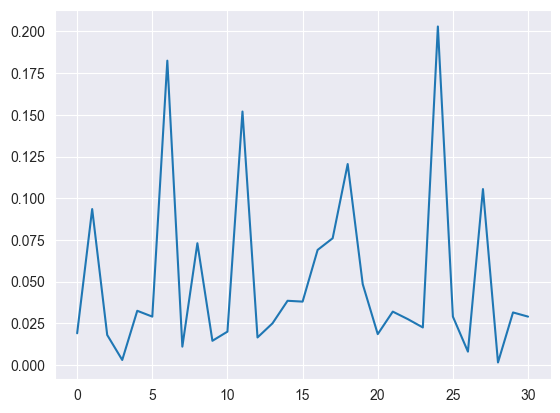

In [183]:
import matplotlib.pyplot as plts
plt.plot(values,"")

In [184]:
#testing for different times
def slotboard_creation(df,hour):
    slotboard = []  #creating a board with all slots and inside a slot are all stones that fall during this period,
    for i in range(1,4):
        for j in range(1,32):
            slot = []
            if j == 9:
                date1 = "2019-0"+str(i)+"-0"+str(j)
                date2 = "2019-0"+str(i)+"-10"
            elif j >= 10:
                date1 = "2019-0"+str(i)+"-"+str(j)
                date2 = "2019-0"+str(i)+"-"+str(j+1)
            elif j < 9:
                date1 = "2019-0"+str(i)+"-0"+str(j)
                date2 = "2019-0"+str(i)+"-0"+str(j+1)


            df_temp = df[df['Date'].str.match(date1)]
            df_temp2 = df[df['Date'].str.match(date2)]

            for x in range(len(df_temp)):  #all stones that fall in a slot after 8 a.m.
                timee = df_temp.iloc[x,1]
                timee = int(timee[0:2])
                if timee > hour:
                    slot.append(df_temp.iloc[x,:])

            for x in range(len(df_temp2)):  #all stones that fall in a slot before 8 a.m. the next day
                timee = df_temp2.iloc[x,1]
                timee = int(timee[0:2])
                if timee <= hour:
                    slot.append(df_temp2.iloc[x,:])

            slotboard.append(slot)
    return slotboard


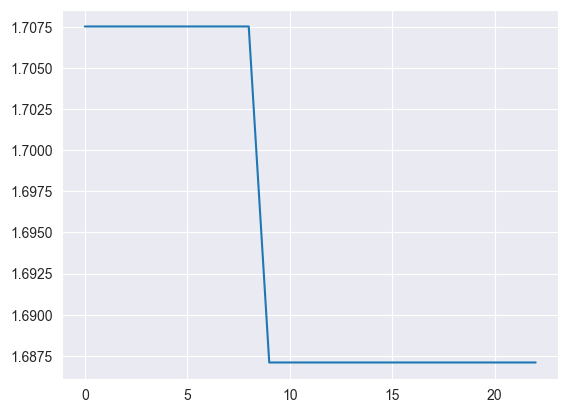

In [185]:
x = []
v = []
med = []
for i in range(0,23):


    x.append(slotboard_creation(df,i))

    inc = incident_calc(x[i])
    values = []
    temp1 = 0
    for j in range(len(inc)):
        values.append(inc[j][0])
        temp1 += inc[j][0]
    v.append(values)
    temp2 = (temp1/len(x[i]))*100
    med.append(temp2)

#print(x[0])

#print(med)

for i in range(len(v)):
    total = 0
    for j in range(len(v[i])):
        #print(x[i][j])
        if v[i][j] >= 1:
            total += 1
    #print(total)

plt.plot(med)


(array([0.01470588, 0.04411765, 0.08823529, 0.11764706, 0.14705882,
        0.22058824, 0.32352941, 0.35294118, 0.39705882, 0.47058824,
        0.48529412, 0.48529412, 0.51470588, 0.55882353, 0.61764706,
        0.63235294, 0.64705882, 0.70588235, 0.70588235, 0.72058824,
        0.72058824, 0.72058824, 0.73529412, 0.73529412, 0.75      ,
        0.75      , 0.77941176, 0.79411765, 0.79411765, 0.80882353,
        0.80882353, 0.80882353, 0.82352941, 0.83823529, 0.83823529,
        0.83823529, 0.85294118, 0.86764706, 0.86764706, 0.86764706,
        0.86764706, 0.88235294, 0.89705882, 0.89705882, 0.89705882,
        0.89705882, 0.91176471, 0.91176471, 0.91176471, 0.91176471,
        0.91176471, 0.91176471, 0.91176471, 0.91176471, 0.91176471,
        0.91176471, 0.91176471, 0.91176471, 0.91176471, 0.91176471,
        0.91176471, 0.92647059, 0.92647059, 0.92647059, 0.92647059,
        0.94117647, 0.94117647, 0.94117647, 0.94117647, 0.94117647,
        0.95588235, 0.95588235, 0.95588235, 0.95

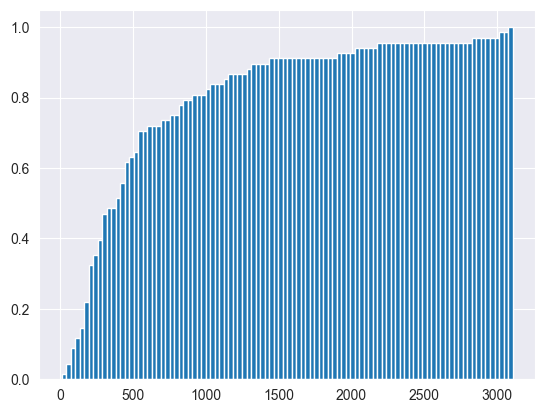

In [186]:
temp = df1.iloc[:,2]
temp = temp.sort_values()
plt.hist(temp,cumulative=True,density=True,bins=100)


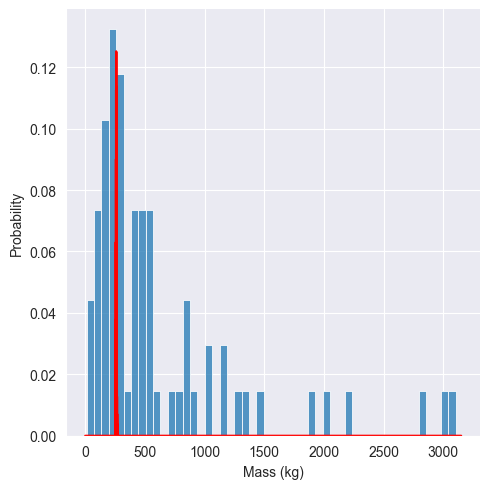

In [187]:
import numpy as np
from scipy.stats import poisson

temp = df1.iloc[:,2]
#temp = temp.sort_values()
sns.displot(temp,bins=50, stat="probability", common_norm=True)
x = np.arange(0, 3150, 0.1)
y = poisson.pmf(x, mu=10, loc=250)
plt.plot(x,y,color="red")
plt.show()